In [1]:
# !nvidia-smi

In [2]:
# !pip install fastai2
# !pip install git+https://github.com/lgvaz/faststyle.git

In [3]:
from fastai2.basics import *
from fastai2.vision.all import *
from faststyle import *

In [4]:
source = untar_data(URLs.COCO_SAMPLE)

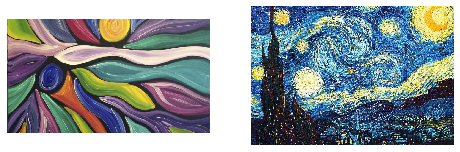

In [5]:
# Fix styles for colab
style_dir = Path('styles')
style_fns = L(style_dir/'abstract.jpg', style_dir/'starry_night.jpg')
show_images([PILImage.create(fn) for fn in style_fns])

In [6]:
dblock = DataBlock(style_blocks, get_items=get_image_files, splitter=RandomSplitter(.1),
                   item_tfms=[Resize(128)],
                   batch_tfms=[*aug_transforms(), NormalizeX.from_stats(*imagenet_stats)])

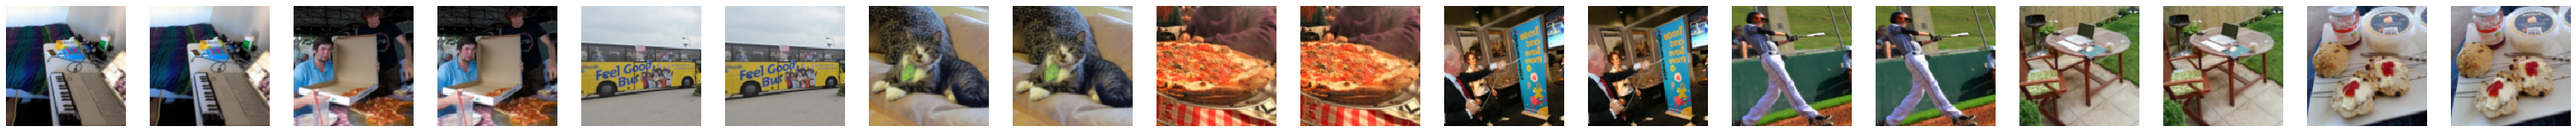

In [7]:
dls = dblock.dataloaders(source, bs=32)
dls.show_batch(rows=1)

In [8]:
get_feats = LayerFeats.from_feat_m(FeatModels.vgg19)

In [9]:
m = TransformerNet()
learn = style_learner(dls, m, get_feats, style_fns)

In [10]:
# learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,stl,cnt,tv,time


In [ ]:
learn.show_results()